# EDA

In [2]:
import pandas as pd
import sqlite3

df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

# df.info()

df.head()

# df.shape

# df.columns

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [37]:
print(df.columns.tolist())


['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']


In [ ]:
df = pd.read_csv("Sample-Superstore-clean.csv", encoding="latin-1")

# Conectar a SQLite (esto crea el archivo superstore.db si no existe)
conn = sqlite3.connect("superstore.db")

# Guardar los datos en una tabla llamada "Superstore"
df.to_sql("Superstore", conn, if_exists="replace", index=False)



9994

# Create TABLES + CSV

## Customer

In [136]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

customer_table = """
   CREATE TABLE IF NOT EXISTS customer (
      customer_id  TEXT PRIMARY KEY,
      customername TEXT NOT NULL,
      segment      TEXT
   )
"""
cur.execute(customer_table)

cur.close()
conn.close()

In [137]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

customer_table = df[["Customer ID", "Customer Name", "Segment"]].copy()
customer_table.rename(columns={"Customer ID": "customer_id", "Customer Name": "customername", "Segment": "segment"}, inplace=True)
customer_table.drop_duplicates(subset=["customer_id"], inplace=True)

customer_table.to_csv("customer.csv", index=False)

In [138]:
conn = sqlite3.connect("shop.db")

customer_table.to_sql(
   "customer", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

In [139]:
df_customer = pd.read_csv("customer.csv", encoding="latin-1")

df_customer.info

<bound method DataFrame.info of     customer_id       customername      segment
0      CG-12520        Claire Gute     Consumer
1      DV-13045    Darrin Van Huff    Corporate
2      SO-20335     Sean O'Donnell     Consumer
3      BH-11710    Brosina Hoffman     Consumer
4      AA-10480       Andrew Allen     Consumer
..          ...                ...          ...
788    CJ-11875       Carl Jackson    Corporate
789    RS-19870         Roy Skaria  Home Office
790    SC-20845         Sung Chung     Consumer
791    RE-19405    Ricardo Emerson     Consumer
792    SM-20905  Susan MacKendrick     Consumer

[793 rows x 3 columns]>

## Orders

In [140]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

orders_table = """
CREATE TABLE IF NOT EXISTS orders (
  order_id     TEXT    PRIMARY KEY,
  address_id   INTEGER NOT NULL,
  customer_id  TEXT    NOT NULL,
  ship_mode    TEXT,
  ship_date    TEXT,
  FOREIGN KEY (address_id)  REFERENCES address(address_id),
  FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);
"""

cur.execute(orders_table) 
conn.commit()
cur.close()
conn.close()


In [141]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

orders_table = df[["Order ID", "Customer ID", "Ship Mode", "Ship Date"]].copy()

orders_table.drop_duplicates(subset=["Order ID"], inplace=True)

orders_table["address_id"] = range(1, len(orders_table) + 1)

orders_table.rename(columns={
    "Order ID": "order_id",
    "Customer ID": "customer_id",
    "Ship Mode": "ship_mode",
    "Ship Date": "ship_date"
}, inplace=True)

orders_table.to_csv("orders.csv", index=False)


In [142]:
# Populate

conn = sqlite3.connect("shop.db")

orders_table.to_sql(
   "orders", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Address

In [143]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

address_table = """
CREATE TABLE IF NOT EXISTS address (
  address_id  INTEGER PRIMARY KEY,
  customer_id TEXT NOT NULL,
  country     TEXT,
  city        TEXT,
  postalcode  TEXT,      
  region      TEXT,
  state       TEXT,
  FOREIGN KEY (customer_id) REFERENCES customer(customer_id)
);
"""

cur.execute(address_table)
conn.commit()
cur.close()
conn.close()


In [144]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

df["address_id"] = range(1, len(df) + 1)

address_table = df[["address_id", "Customer ID", "Country", "City", "Postal Code", "Region", "State"]].copy()
address_table.rename(columns={"Customer ID": "customer_id", "Country": "country", "City": "city", "Postal Code": "postalcode", "Region": "region", "State": "state"}, inplace=True)
address_table = address_table.drop_duplicates(
    subset=["country", "city", "postalcode", "region", "state"]
)

address_table.to_csv("address.csv", index=False)

In [145]:
conn = sqlite3.connect("shop.db")

address_table.to_sql(
   "address", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Product

In [146]:
conn = sqlite3.connect("shop.db")
cur = conn.cursor()

cur.execute("PRAGMA foreign_keys = ON;")

product_table = """
CREATE TABLE IF NOT EXISTS product (
  product_id   TEXT PRIMARY KEY, 
  productname  TEXT,
  category     TEXT,
  subcategory  TEXT
);
"""
cur.execute(product_table)

conn.commit()
cur.close()
conn.close()


In [147]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

product_table = df[["Product ID", "Product Name", "Category", "Sub-Category"]].copy()
product_table.rename(columns={"Product ID": "product_id", "Product Name": "productname", "Category": "category", "Sub-Category": "subcategory"}, inplace=True)
product_table = product_table.drop_duplicates(subset=["product_id"], keep="first")

product_table.to_csv("product.csv", index=False)

In [148]:
conn = sqlite3.connect("shop.db")

product_table.to_sql(
   "product", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

## Sales

In [150]:
import sqlite3 

conn = sqlite3.connect("shop.db")
cur = conn.cursor()

sales_table = """
CREATE TABLE IF NOT EXISTS sales (
  sale_id      INTEGER PRIMARY KEY,
  order_id     TEXT    NOT NULL,
  product_id   TEXT    NOT NULL,
  sales_amount REAL,
  quantity     INTEGER,
  discount     REAL,
  profit       REAL,
  FOREIGN KEY (order_id)  REFERENCES orders(order_id),
  FOREIGN KEY (product_id) REFERENCES product(product_id)
);
"""
cur.execute(sales_table)
conn.commit() 
cur.close()
conn.close()



In [151]:
df = pd.read_csv("Sample_Superstore.csv", encoding="latin-1")

sales_table = df[["Order ID", "Product ID", "Sales", "Quantity", "Discount", "Profit"]].copy()
sales_table.rename(columns={"Order ID": "order_id", "Product ID": "product_id", "Sales": "sales_amount", "Quantity": "quantity", "Discount": "discount", "Profit": "profit"}, inplace=True)
sales_table.drop_duplicates(inplace=True)

sales_table.to_csv("sales.csv", index=False)

In [152]:
conn = sqlite3.connect("shop.db")

sales_table.to_sql(
   "sales", # the name of the table
   con=conn, # the connection variable
   index=False, # whether to include the index column
   if_exists="append" # define behavior if table already exists
)
conn.close()

# SPRINT 1

## TOP CATEGORIES 

In [153]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_all_categories = """
SELECT 
    p.category,
    SUM(s.sales_amount) AS total_sales
FROM sales s
JOIN product p ON s.product_id = p.product_id
GROUP BY p.category
ORDER BY total_sales DESC;
"""

cur.execute(sql_all_categories)
rows = cur.fetchall()

# Only two columns here:
all_categories_df = pd.DataFrame(rows, columns=["category", "total_sales"])
print(all_categories_df)

cur.close()
conn.close()

          category  total_sales
0       Technology  836154.0330
1        Furniture  741718.4233
2  Office Supplies  719047.0320


In [154]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_loss_categories = """
SELECT p.category,
       SUM(s.profit) AS total_profit
FROM sales s
JOIN product p
  ON p.product_id = s.product_id
GROUP BY p.category
HAVING total_profit < 0;
"""

cur.execute(sql_loss_categories)
rows = cur.fetchall()
loss_categories_df = pd.DataFrame(rows, columns=["category", "total_profit"])
print("Categories with losses:")
print(loss_categories_df)

cur.close()
conn.close()


Categories with losses:
Empty DataFrame
Columns: [category, total_profit]
Index: []


In [155]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_categories = """
SELECT
  p.category,
  SUM(s.profit) AS total_profit
FROM sales s
JOIN product p ON p.product_id = s.product_id
GROUP BY p.category
ORDER BY total_profit ASC
"""
cur.execute(sql_categories)
rows = cur.fetchall()

sql_categories_df = pd.DataFrame(rows, columns=["category", "total_profit"])
print("sql_categories:")
print(sql_categories_df)

cur.close()
conn.close()

sql_categories:
          category  total_profit
0        Furniture    18463.3316
1  Office Supplies   122490.8008
2       Technology   145454.9481


In [156]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

sql_loss_subcategories = """
SELECT p.category,
       p.subcategory,
       SUM(s.profit) AS total_profit
FROM sales s
JOIN product p
  ON p.product_id = s.product_id
GROUP BY p.category, p.subcategory
HAVING total_profit < 0;
"""

cur.execute(sql_loss_subcategories)
rows = cur.fetchall()
loss_subcategories_df = pd.DataFrame(rows, columns=["category", "subcategory", "total_profit"])
print("Subcategories with losses:")
print(loss_subcategories_df)

cur.close()
conn.close()


Subcategories with losses:
          category subcategory  total_profit
0        Furniture   Bookcases    -3472.5560
1        Furniture      Tables   -17725.4811
2  Office Supplies    Supplies    -1189.0995


What are 5 states generating the maximum and minimum sales revenue?

In [165]:
conn = sqlite3.connect("shop.db")

sql_top5_states = """
SELECT 
    a.state,
    SUM(s.sales_amount)  AS total_sales,
    SUM(s.profit) AS total_profit
FROM sales   s
JOIN orders  o ON o.order_id   = s.order_id
JOIN address a ON a.customer_id = o.customer_id
WHERE a.state IS NOT NULL AND a.state <> ''
GROUP BY a.state
ORDER BY total_sales DESC
LIMIT 5;
"""

top5_states_df = pd.read_sql_query(sql_top5_states, conn)
print("Top 5 states by sales:")
print(top5_states_df)

conn.close()

Top 5 states by sales:
        state  total_sales  total_profit
0  California  315605.6832    47000.7112
1       Texas  158574.0370     9970.5265
2     Florida  125937.8810     9172.0281
3    Illinois  113503.2325    12612.3119
4        Ohio   78327.8850     7064.6194


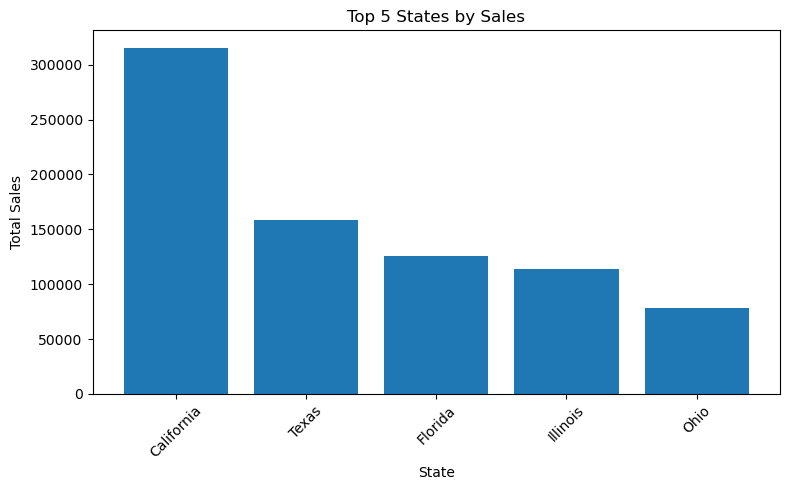

In [168]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(top5_states_df["state"], top5_states_df["total_sales"])
plt.title("Top 5 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [166]:
conn = sqlite3.connect("shop.db")
cur  = conn.cursor()

# Bottom 5 states by sales (also shows profit)
sql_bottom5_states = """
SELECT a.state,
       SUM(s.sales_amount)  AS total_sales,
       SUM(s.profit) AS total_profit
FROM sales   s
JOIN orders  o ON o.order_id   = s.order_id
JOIN address a ON a.customer_id = o.customer_id
GROUP BY a.state
ORDER BY total_sales ASC
LIMIT 5;
"""
cur.execute(sql_bottom5_states)
rows = cur.fetchall()

bottom5_states_df = pd.DataFrame(rows, columns=["state", "total_sales", "total_profit"])
print("Bottom 5 states by sales:")
print(bottom5_states_df)

cur.close()
conn.close()

Bottom 5 states by sales:
           state  total_sales  total_profit
0        Wyoming     2453.284      280.7822
1   North Dakota     2461.404      580.3075
2  West Virginia     3082.653       96.2702
3        Vermont     6108.338     1203.6768
4       Nebraska     7174.848     1565.5789


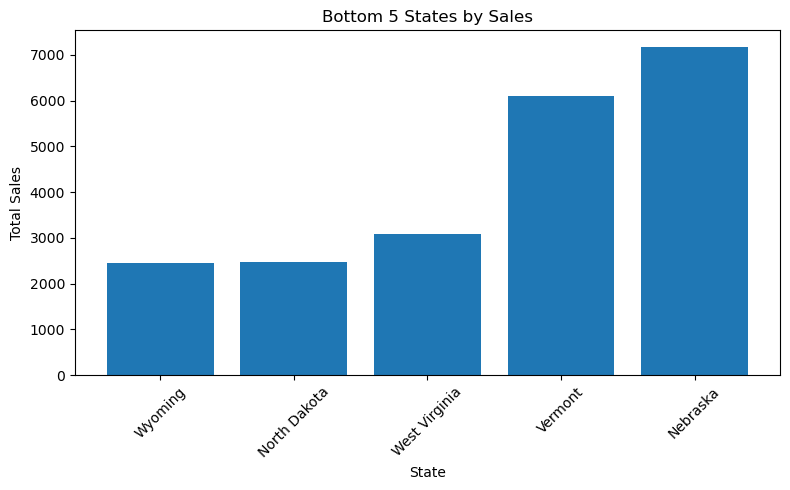

In [163]:
import matplotlib.pyplot as plt

# --- Bar chart de ventas (bottom 5 states) ---
plt.figure(figsize=(8,5))
plt.bar(bottom5_states_df["state"], bottom5_states_df["total_sales"])
plt.title("Bottom 5 States by Sales")
plt.xlabel("State")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


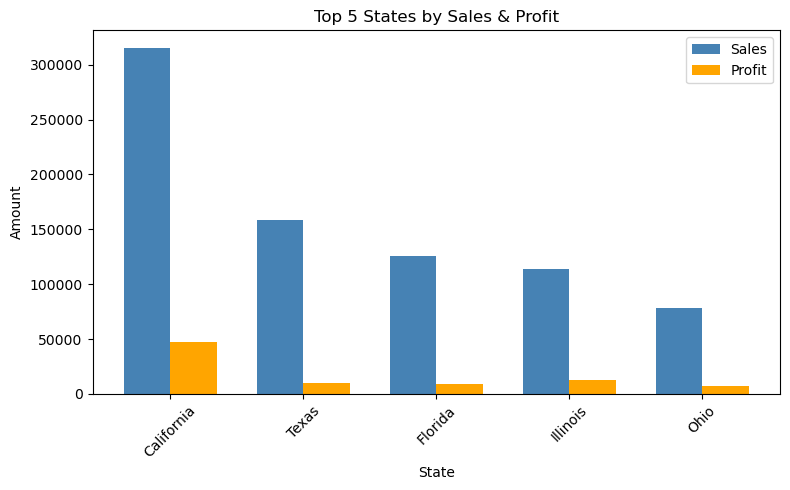

In [169]:
import numpy as np

x = np.arange(len(top5_states_df["state"]))  # posiciones
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, top5_states_df["total_sales"], width, label="Sales", color="steelblue")
ax.bar(x + width/2, top5_states_df["total_profit"], width, label="Profit", color="orange")

ax.set_title("Top 5 States by Sales & Profit")
ax.set_xlabel("State")
ax.set_ylabel("Amount")
ax.set_xticks(x)
ax.set_xticklabels(top5_states_df["state"], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()


# Top 3 products per segment by SALES

In [252]:
import sqlite3, pandas as pd

conn = sqlite3.connect("shop.db")
sql = """
SELECT
  c.segment,
  p.productname,
  SUM(s.sales)  AS total_sales,
  SUM(s.profit) AS total_profit
FROM sales s
JOIN product  p ON p.order_id = s.order_id AND p.product_id = s.product_id
JOIN orders   o ON o.order_id = s.order_id
JOIN customer c ON c.customer_id = o.customer_id
GROUP BY c.segment, p.productname;
"""
df = pd.read_sql_query(sql, conn)
conn.close()

# Top 3 products per segment by SALES
top3 = (
    df.sort_values(["segment","total_sales"], ascending=[True, False])
      .groupby("segment", as_index=False, group_keys=False)
      .head(3)
)

print(top3[["segment","productname","total_sales"]])



          segment                                        productname  \
372      Consumer              Canon imageCLASS 2200 Advanced Copier   
730      Consumer  HP Designjet T520 Inkjet Large Format Printer ...   
729      Consumer       HON 5400 Series Task Chairs for Big and Tall   
2012    Corporate              Canon imageCLASS 2200 Advanced Copier   
1721    Corporate   3D Systems Cube Printer, 2nd Generation, Magenta   
2534    Corporate  Martin Yale Chadless Opener Electric Letter Op...   
3411  Home Office  Cisco TelePresence System EX90 Videoconferenci...   
3387  Home Office              Canon imageCLASS 2200 Advanced Copier   
3627  Home Office               Hewlett Packard LaserJet 3310 Copier   

      total_sales  
372     32899.906  
730     18374.895  
729     17384.304  
2012    17499.950  
1721    14299.890  
2534     8328.100  
3411    22638.480  
3387    11199.968  
3627     9239.846  


# TOP 3 products per segment

In [253]:
conn = sqlite3.connect("shop.db")

# 1) Get totals per segment & product (quantity-wise)
sql = """
SELECT
  c.segment,
  p.productname,
  SUM(s.quantity) AS total_qty
FROM sales s
JOIN product  p ON p.order_id = s.order_id AND p.product_id = s.product_id
JOIN orders   o ON o.order_id = s.order_id
JOIN customer c ON c.customer_id = o.customer_id
GROUP BY c.segment, p.productname;
"""
df = pd.read_sql_query(sql, conn)
conn.close()

# 2) Keep the 3 best-sellers by quantity in each segment
top3_qty = (
    df.sort_values(["segment","total_qty"], ascending=[True, False])
      .groupby("segment", as_index=False, group_keys=False)
      .head(3)
)

print(top3_qty)


          segment                             productname  total_qty
1373     Consumer                         Staple envelope        104
1378     Consumer                                 Staples         97
1379     Consumer                 Staples in misc. colors         75
2887    Corporate                                 Staples         90
2881    Corporate                         Staple envelope         63
2119    Corporate                       Easy-staple paper         44
3466  Home Office                       Easy-staple paper         46
3604  Home Office  Global Stack Chair without Arms, Black         31
4234  Home Office                               Xerox 226         31


# TOP 3 worst products per category

In [261]:
conn = sqlite3.connect("shop.db")

sql = """
SELECT
  c.segment,
  p.productname,
  SUM(s.quantity) AS total_qty
FROM sales s
JOIN product  p ON p.order_id = s.order_id AND p.product_id = s.product_id
JOIN orders   o ON o.order_id = s.order_id
JOIN customer c ON c.customer_id = o.customer_id
GROUP BY c.segment, p.productname;
"""
df = pd.read_sql_query(sql, conn)
conn.close()

top3_qty = (
    df.sort_values(["segment","total_qty"], ascending=[True, False])
      .groupby("segment", as_index=False, group_keys=False)
      .head(3)
)

print(top3_qty)


          segment                             productname  total_qty
1373     Consumer                         Staple envelope        104
1378     Consumer                                 Staples         97
1379     Consumer                 Staples in misc. colors         75
2887    Corporate                                 Staples         90
2881    Corporate                         Staple envelope         63
2119    Corporate                       Easy-staple paper         44
3466  Home Office                       Easy-staple paper         46
3604  Home Office  Global Stack Chair without Arms, Black         31
4234  Home Office                               Xerox 226         31
